<a href="https://colab.research.google.com/github/BrnCode/Previsao_Alugueis_Bicicletas_Series_Temporais/blob/main/EDA_locacoes_de_bicicleta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de Previsão de Aluguéis de Bicicletas com Séries Temporais

---
## Objetivos do Projeto:
  - **Análise Exploratória de Dados (EDA):** Entender a estrutura, as características, sazonalidades e as tendências presentes nos dados.
  - **Análise Preditiva:** Desenvolveremos um modelo preditivo para antecipar eventos ou comportamentos futuros. Neste projeto, utilizaremos o Prophet para esse propósito.

---

## Dataset: Aluguel de Bicicletas em Londres

**Link:** https://github.com/BrnCode/Previsao_Alugueis_Bicicletas_Series_Temporais/blob/main/bicicletas.csv

**Resumo:**
- **Contexto:** Para este projeto, utilizaremos um conjunto de dados fornecido pela Alura no curso de séries temporais. Este conjunto de dados contém informações coletadas ao longo de 2 anos sobre uma empresa de aluguel de bicicletas que atua em Londres. Saber onde isso ocorre é um fator importante, pois o conjunto de dados inclui informações sobre o clima. Portanto, é necessário considerar informações sobre como as estações do ano ocorrem no hemisfério norte.
---

## 1 - Análise Exploratória de Dados (EDA):

In [ ]:
import pandas as pd
import numpy as np

### Pre tratamento

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/BrnCode/Previsao_Alugueis_Bicicletas_Series_Temporais/bicicletas.csv")
df.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Nublado,Não,Sim,Inverno
1,2015-01-04 01:00:00,138,NaN,NaN,93.0,5.0,Céu limpo,Não,Sim,Inverno
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Céu limpo,Não,Sim,Inverno
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,Céu limpo,Não,Sim,Inverno
4,2015-01-04 04:00:00,47,NaN,NaN,93.0,6.5,Céu limpo,Não,Sim,Inverno


In [ ]:
df.shape

(17429, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17429 entries, 0 to 17428
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data_hora         17429 non-null  object 
 1   contagem          17429 non-null  int64  
 2   temperatura       17406 non-null  float64
 3   sensacao_termica  17406 non-null  float64
 4   umidade           17429 non-null  float64
 5   velocidade_vento  17429 non-null  float64
 6   clima             17429 non-null  object 
 7   feriado           17429 non-null  object 
 8   fim_de_semana     17429 non-null  object 
 9   estacao           17429 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 1.3+ MB


In [ ]:
df.columns

Index(['data_hora', 'contagem', 'temperatura', 'sensacao_termica', 'umidade',
       'velocidade_vento', 'clima', 'feriado', 'fim_de_semana', 'estacao'],
      dtype='object')

In [ ]:
df.isnull().sum()

data_hora            0
contagem             0
temperatura         23
sensacao_termica    23
umidade              0
velocidade_vento     0
clima                0
feriado              0
fim_de_semana        0
estacao              0
dtype: int64

In [ ]:
df["temperatura"] = df["temperatura"].interpolate()
df["sensacao_termica"] = df["sensacao_termica"].interpolate()

In [ ]:
df.duplicated().sum()

15

In [ ]:
df = df.drop_duplicates()
df.shape

(17414, 10)

In [ ]:
df = df.sort_values(by='data_hora')
df.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
0,2015-01-04 00:00:00,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno
1,2015-01-04 01:00:00,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno
2,2015-01-04 02:00:00,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno
3,2015-01-04 03:00:00,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno
4,2015-01-04 04:00:00,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno


## Analise descritiva

### Olhando para as variaveis numericas

In [ ]:
df.describe()

,contagem,temperatura,sensacao_termica,umidade,velocidade_vento
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468206,11.521080,72.324954,15.913063
std,1085.108068,5.571670,6.614799,14.313186,7.894570
min,0.000000,-1.500000,-6.000000,20.500000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000
max,7860.000000,34.000000,34.000000,100.000000,56.500000


* Contagem:

A alta variação (desvio padrão: 1085.11) e a grande diferença entre os valores mínimo (0) e máximo (7860) sugerem uma diversidade nos dados de contagem, possivelmente refletindo diferentes condições climaticas ou preferencias em dias da semana.

* Temperatura e Sensação Térmica:

As médias (12.47°C e 11.52°C, respectivamente) são próximas, o que é esperado, mas a sensação térmica geralmente é um pouco menor.
A variação nas temperaturas (desvio padrão: 5.57°C para temperatura e 6.61°C para sensação térmica) é significativa, com temperaturas mínimas abaixo de zero (-1.5°C) e máximas chegando a 34.0°C, o vai nos mostrar se existe alguma preferencia ou restrição para baixas ou altas temperaturas.
Os quartis mostram uma distribuição razoavelmente simétrica ao redor da mediana, com temperaturas de 8.0°C a 16.0°C cobrindo a maioria dos dados (entre Q1 e Q3).

* Umidade:

A média de umidade é alta (72.32%), e a variação (desvio padrão: 14.31%) mostra que a umidade varia bastante.
O intervalo interquartil (63.0% a 83.0%) indica que a maioria das medições de umidade está dentro desse intervalo.

* Velocidade do Vento:

A velocidade média do vento é 15.91 km/h, com uma variação significativa (desvio padrão: 7.89 km/h).
As velocidades do vento variam de 0 km/h (calma) a um máximo de 56.5 km/h (ventos muito fortes).
A maioria dos valores está entre 10.0 km/h e 20.5 km/h, como mostrado pelos quartis.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


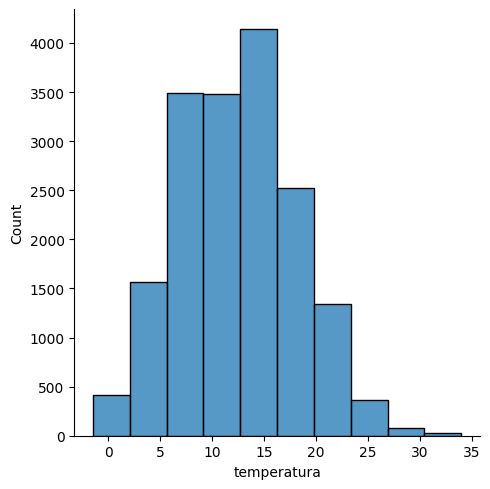

In [ ]:
sns.displot(df, x="temperatura", bins=10)

plt.show()

Temos uma distribuição normal ou quase normal com uma leve inclinação para a direita, mostrando que a maior parte dos alugueis é feita quando se tem 15 graus de temperatura.

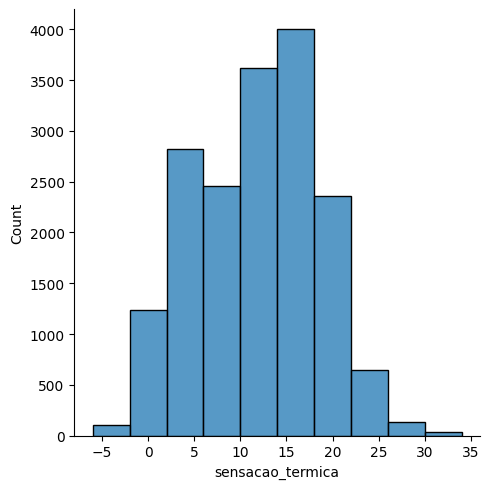

In [ ]:
sns.displot(df, x="sensacao_termica", bins=10)

plt.show()

A distribuição da sensação termica segue um padrão similar ao da temperatura, porem, com uma assimetria para esquerda, especialmente porque inclui vamores a baixo de 0.

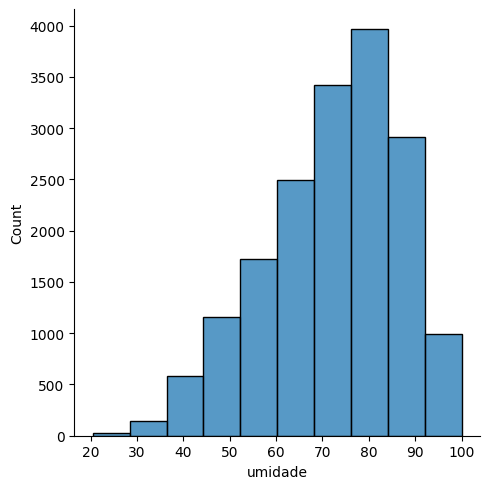

In [ ]:
sns.displot(df, x="umidade", bins=10)

plt.show()

Já para a umidade, temos um gráfico bastante assimétrico para a esquerda, mas que não tem seu pico no máximo dos valores apresentados, o que seria um pico de aluguéis quando chove. No entanto, a umidade "preferida" para pedalar é em torno de 80%, o que torna o clima agradável.

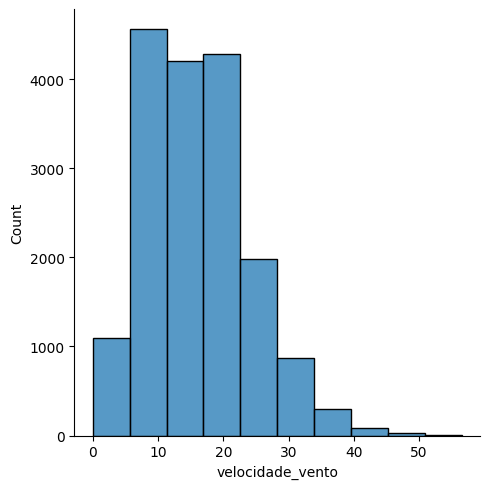

In [ ]:
sns.displot(df, x="velocidade_vento", bins=10)

plt.show()

E na velocidade do vento temos um grafico oposto ao de cima, tendo ventos mais amenos como o favorito para pedalar.

In [ ]:
df_c = df[['contagem', 'temperatura', 'sensacao_termica', 'umidade',
       'velocidade_vento']]

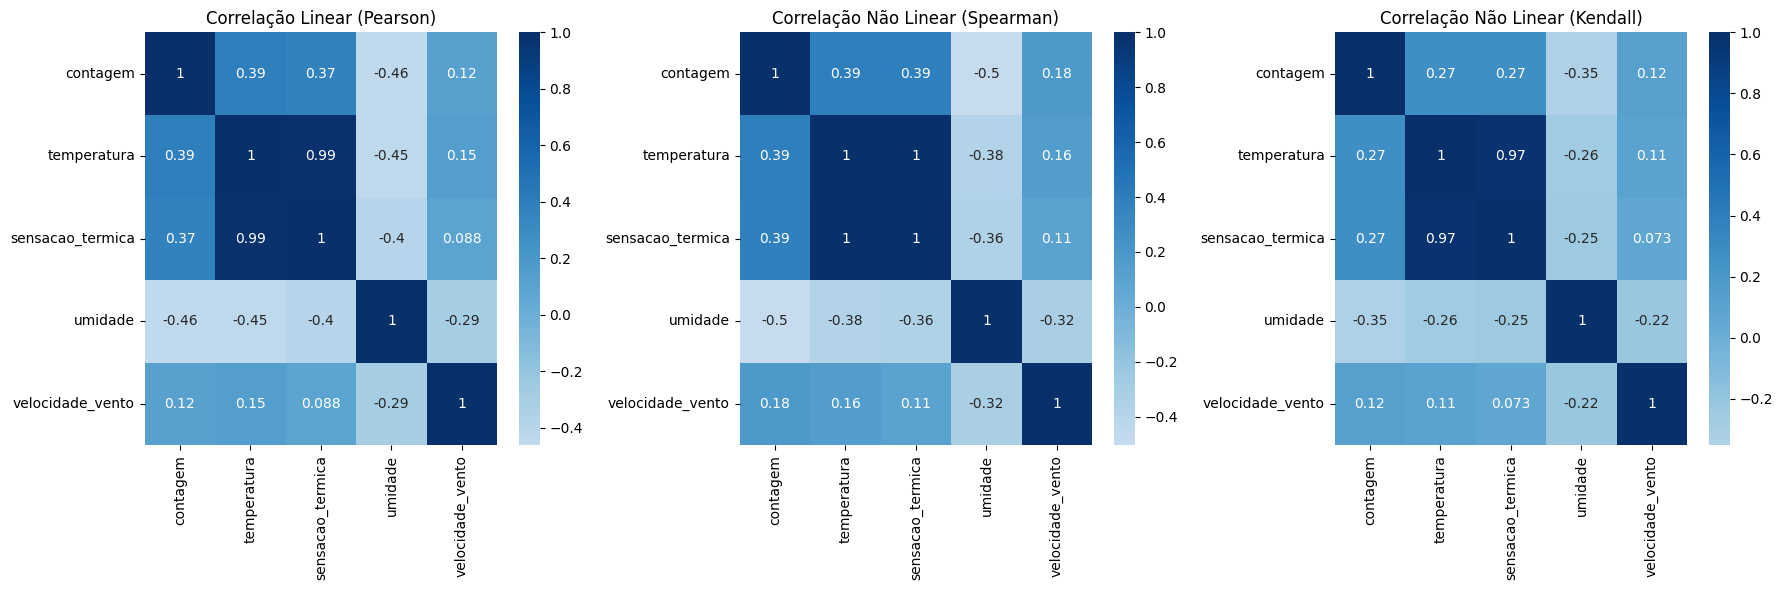

In [ ]:
# Correlações lineares (Pearson)
corr_pearson = df_c.corr(method='pearson')

# Correlações não lineares (Spearman)
corr_spearman = df_c.corr(method='spearman')

# Correlações não lineares (Kendall)
corr_kendall = df_c.corr(method='kendall')

# Plotando os heatmaps
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.heatmap(corr_pearson, annot=True, cmap='Blues', center=0)
plt.title('Correlação Linear (Pearson)')

plt.subplot(1, 3, 2)
sns.heatmap(corr_spearman, annot=True, cmap='Blues', center=0)
plt.title('Correlação Não Linear (Spearman)')

plt.subplot(1, 3, 3)
sns.heatmap(corr_kendall, annot=True, cmap='Blues', center=0)
plt.title('Correlação Não Linear (Kendall)')

plt.tight_layout()
plt.show()


Ao analisar três tipos de correlações, podemos entender como as variáveis presentes em nosso conjunto de dados se relacionam com nossa variável alvo, a **contagem**. Na correlação de Pearson, que é linear, observamos que a temperatura e a sensação térmica têm uma boa relação com a contagem, e que elas têm uma correlação quase perfeita entre si. Observamos um comportamento similar nas correlações de Spearman e Kendall, que são correlações não lineares e não paramétricas.

### Olhando para as variaveis categoricas

In [ ]:
df.describe(include=[object])

,data_hora,clima,feriado,fim_de_semana,estacao
count,17414,17414,17414,17414,17414
unique,17414,6,2,2,4
top,2015-01-04 00:00:00,Céu limpo,Não,Não,Primavera
freq,1,6150,17030,12444,4394


In [ ]:
for i in df[['clima', 'feriado', 'fim_de_semana', 'estacao']]:
    print(f'Coluna: {i}')
    print(df[i].unique())
    print(' ')

Coluna: clima
['Nublado' 'Céu limpo' 'Parcialmente nublado' 'Chuva leve' 'Neve'
 'Chuva com trovoadas']
 
Coluna: feriado
['Não' 'Sim']
 
Coluna: fim_de_semana
['Sim' 'Não']
 
Coluna: estacao
['Inverno' 'Primavera' 'Verão' 'Outono']
 


Tentando entender a influencia de feriados e finais de semana na demanda da locação de bicicleta

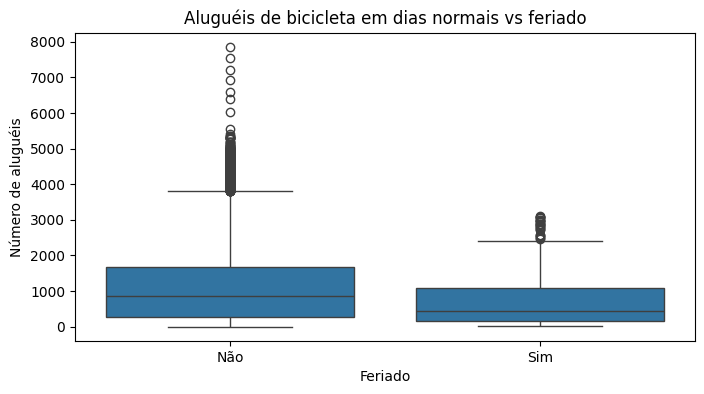

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='feriado', y='contagem', data=df)
plt.title('Aluguéis de bicicleta em dias normais vs feriado')
plt.xlabel('Feriado')
plt.ylabel('Número de aluguéis')
plt.show()

Quando é feriado temos uma mediana menor e menos outliers.

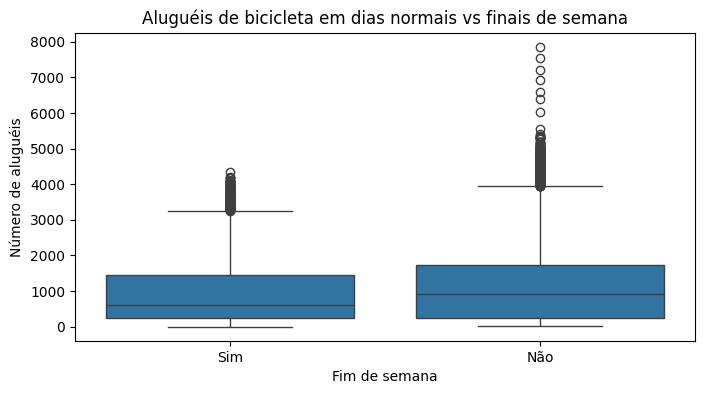

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='fim_de_semana', y='contagem', data=df)
plt.title('Aluguéis de bicicleta em dias normais vs finais de semana')
plt.xlabel('Fim de semana')
plt.ylabel('Número de aluguéis')
plt.show()

Resultado siminar aos feriados, vendo que dias de semana temos uma demanda maior.

In [ ]:
mediana_feriado = df.groupby('feriado')['contagem'].median()
mediana_fds = df.groupby('fim_de_semana')['contagem'].median()

print('Mediana por feriado:')
print(mediana_feriado)
print('\n')
print('Mediana por fim de semana:')
print(mediana_fds)

Mediana por feriado:
feriado
Não    855.0
Sim    439.5
Name: contagem, dtype: float64


Mediana por fim de semana:
fim_de_semana
Não    927.0
Sim    619.0
Name: contagem, dtype: float64


Com isso, temos a certeza de que os dias de semana comuns são os que geram mais aluguéis de bike!

### Olhando para os fatores climaticos

In [ ]:
df_clima = df.groupby('clima')['contagem'].sum().reset_index().sort_values(by='contagem', ascending=False)

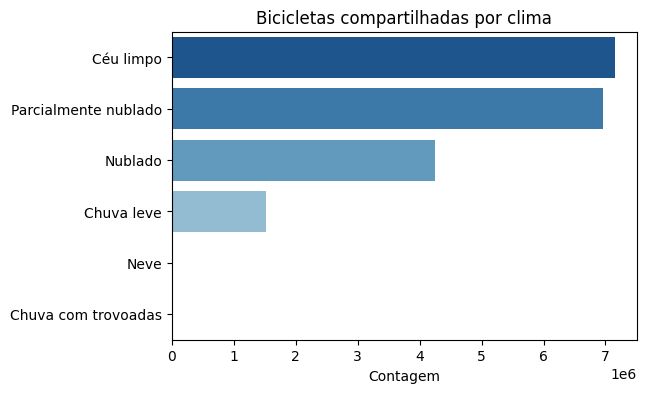

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(data=df_clima, y='clima', x='contagem', hue='clima', palette='Blues_r', orient='h')
plt.title('Bicicletas compartilhadas por clima')
plt.xlabel('Contagem')
plt.ylabel('')
plt.show()

Ceu limpo e parcialmente nublado correspondem a maior parte dos alugueis

In [ ]:
df.columns

Index(['data_hora', 'contagem', 'temperatura', 'sensacao_termica', 'umidade',
       'velocidade_vento', 'clima', 'feriado', 'fim_de_semana', 'estacao'],
      dtype='object')

In [ ]:
df_estacao = df.groupby('estacao')['contagem'].sum().reset_index().sort_values(by='contagem', ascending=False)

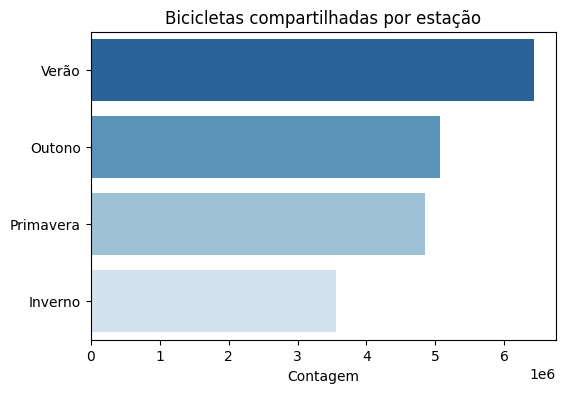

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(data=df_estacao, y='estacao', x='contagem', hue='estacao', palette='Blues_r', orient='h')
plt.title('Bicicletas compartilhadas por estação')
plt.xlabel('Contagem')
plt.ylabel('')
plt.show()

Verão (de julho a agosto) é a estação com mais locações, provavelmente quando plotarmos o grafico de contagem por dia, veremos um pico no meio do ano.

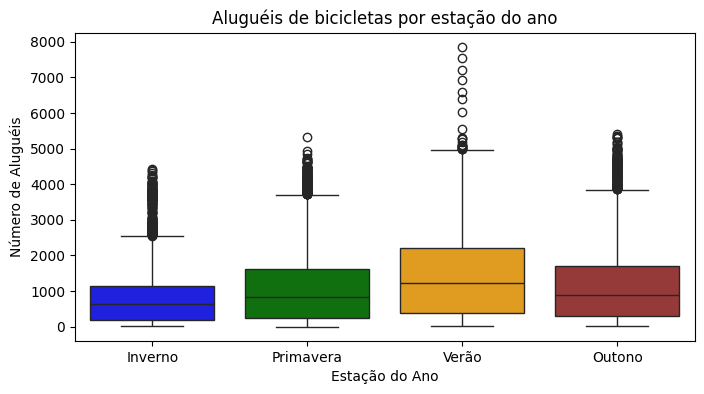

In [ ]:
plt.figure(figsize=(8, 4))
paleta_cores = {'Primavera': 'green', 'Verão': 'orange', 'Outono': 'brown', 'Inverno': 'blue'}
sns.boxplot(x='estacao', y='contagem', data=df, hue='estacao', palette=paleta_cores)
plt.title('Aluguéis de bicicletas por estação do ano')
plt.xlabel('Estação do Ano')
plt.ylabel('Número de Aluguéis')
plt.show()


Primavera e outono tem comportamentos muito parecidos, vamos olhar a mediana:

In [ ]:
df.groupby('estacao')['contagem'].median()

estacao
Inverno       632.0
Outono        898.0
Primavera     823.0
Verão        1214.0
Name: contagem, dtype: float64

Usando o teste (de Mann-Whitney) não parametrico de amostras independentes, para descobrir se as distribuições são iguais ou diferentes.

Nossa **hipotese nula** é que a distribuição das duas estações são iguais e a **hipotese alternativa** é que as estações são diferentes!

In [ ]:
from scipy.stats import mannwhitneyu

In [ ]:
primavera = df[df['estacao'] =='Primavera']['contagem']
outono = df[df['estacao'] =='Outono']['contagem']

u_statistic, p_value = mannwhitneyu(primavera, outono, alternative='two-sided')

u_statistic, p_value

(9044682.5, 0.0004762100221646296)

Quando o P-valor < 0.5, a gente descarta a hipotese nula e adota a hipotese alternativa, pois há uma diferença significativa entre as estações. Logo é necessario planos de ação diferente para cada uma das estações!

### Analisando os dados históricos olhando para os alugueis em diferentes horarios

In [ ]:
df['data_hora'] = pd.to_datetime(df['data_hora'])
df.dtypes

data_hora           datetime64[ns]
contagem                     int64
temperatura                float64
sensacao_termica           float64
umidade                    float64
velocidade_vento           float64
clima                       object
feriado                     object
fim_de_semana               object
estacao                     object
dtype: object

In [ ]:
df_time = df.copy()

In [ ]:
df_time['mes'] = df_time['data_hora'].dt.month
df_time['horario'] = df_time['data_hora'].dt.hour

In [ ]:
df_time.columns

Index(['data_hora', 'contagem', 'temperatura', 'sensacao_termica', 'umidade',
       'velocidade_vento', 'clima', 'feriado', 'fim_de_semana', 'estacao',
       'mes', 'horario'],
      dtype='object')

In [ ]:
df_time['data_hora'] = df_time['data_hora'].dt.date
df_time.head(1)

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao,mes,horario
0,2015-01-04,182,3.0,2.0,93.0,6.0,Nublado,Não,Sim,Inverno,1,0


In [ ]:
df_time = df_time.rename(columns={'data_hora':'data'})
df_time.head(1)

,data,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao,mes,horario
0,2015-01-04,182,3.0,2.0,93.0,6.0,Nublado,Não,Sim,Inverno,1,0


In [ ]:
df_time.dtypes

data                 object
contagem              int64
temperatura         float64
sensacao_termica    float64
umidade             float64
velocidade_vento    float64
clima                object
feriado              object
fim_de_semana        object
estacao              object
mes                   int32
horario               int32
dtype: object

In [ ]:
df_time['data'] = pd.to_datetime(df_time['data'])

In [ ]:
df_por_hora = df_time.groupby('horario')['contagem'].sum().reset_index()
df_por_hora

,horario,contagem
0,0,210401
1,1,145257
2,2,98275
3,3,67951
4,4,52859
5,5,79820
6,6,338771
7,7,1066309
8,8,2087164
9,9,1201745


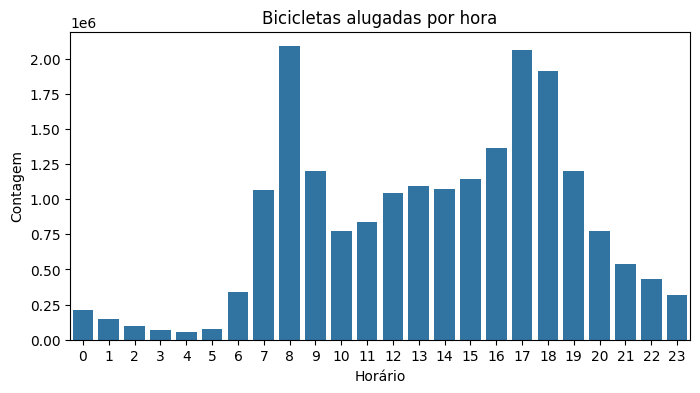

In [ ]:
plt.figure(figsize=(8,4))
sns.barplot(data=df_por_hora, x='horario', y='contagem')
plt.title('Bicicletas alugadas por hora')
plt.xlabel('Horário')
plt.ylabel('Contagem')

plt.show()

Parece que as pessoas usam comumente para ir ao trabalho/escola pela manhã e voltar ao fim da tarde.

In [ ]:
df_fds = df_time[df_time['fim_de_semana'] == 'Sim']

alugueis_fim_de_semana = df_fds.groupby('horario')['contagem'].sum().reset_index()

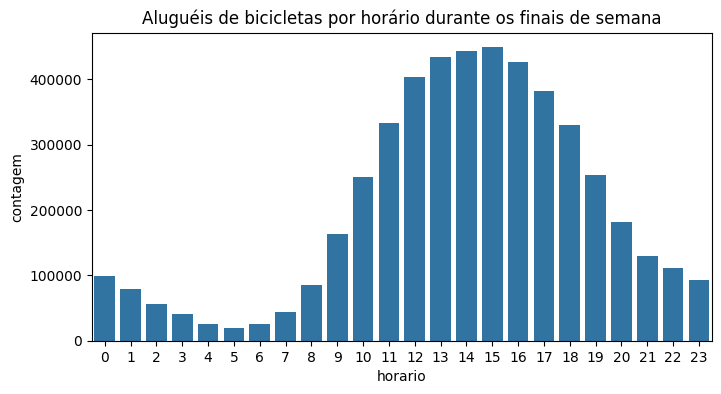

In [ ]:
plt.figure(figsize=(8,4))
sns.barplot(x='horario', y='contagem', data=alugueis_fim_de_semana)
plt.title('Aluguéis de bicicletas por horário durante os finais de semana')

plt.show()

Aos finais de semana vemos uma dinamica diferente, com menos uso para ir e voltar de afazeres em horario comercial, mas com um pico as 15, onde provavelmente se vê pessoas pedalando em parques e avenidas fechadas.

In [ ]:
df_feriado = df_time[df_time['feriado'] == 'Sim']

alugueis_feriado = df_feriado.groupby('horario')['contagem'].sum().reset_index()

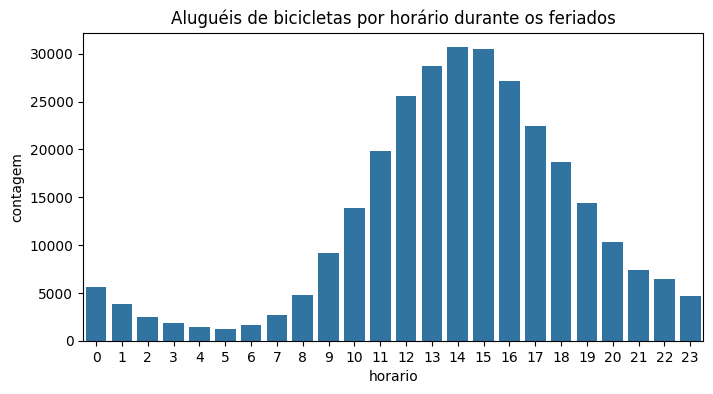

In [ ]:
plt.figure(figsize=(8,4))
sns.barplot(x='horario', y='contagem', data=alugueis_feriado)
plt.title('Aluguéis de bicicletas por horário durante os feriados')

plt.show()

E vemos uma dinamica muito similar nos feriados, reforçando a hipotese citada anteriormente.

In [ ]:
df_tempo = df_time.groupby('data')['contagem'].sum().reset_index()

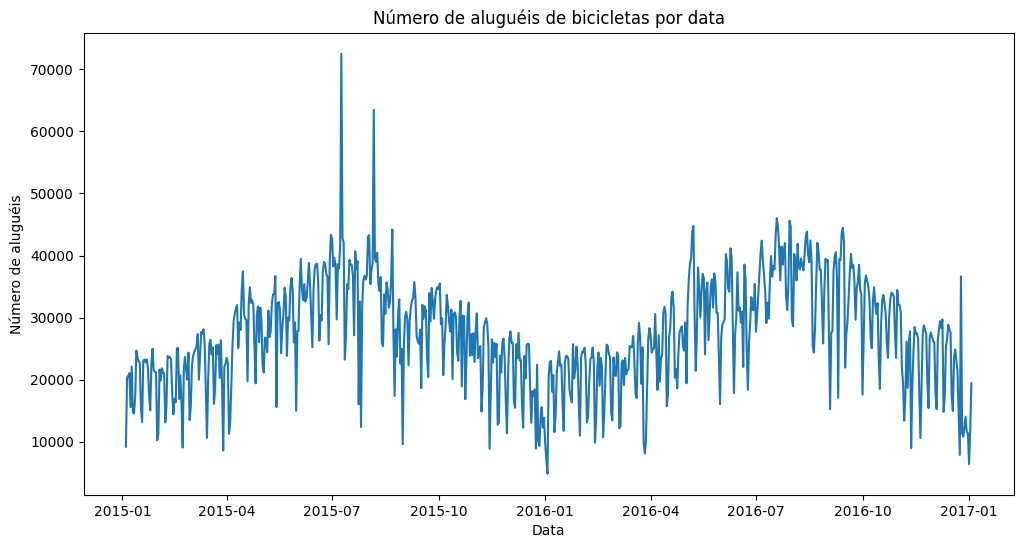

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_tempo, x='data', y='contagem')
plt.title('Número de aluguéis de bicicletas por data')
plt.xlabel('Data')
plt.ylabel('Número de aluguéis')

plt.show()

No começo do ano vemos uma baixa, se comparado ao meio do ano, parece que esse padrão se repete. E após uma curta pesquisa nos picos de 2015 (9 de julho e 6 de agosto), foi possivel entender que os picos se deram a greves metroviarias em Londres, cidade da qual estamos olhando os dados.

In [ ]:
alugueis_mensais = df_time.groupby('mes')['contagem'].sum().reset_index()

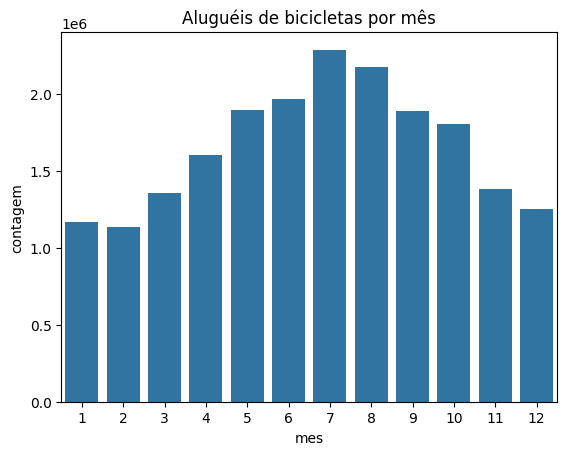

In [ ]:
sns.barplot(data=alugueis_mensais, x='mes', y='contagem')
plt.title('Aluguéis de bicicletas por mês')

plt.show()

Vemos a sazonalidade dos dados se mostrando mais fortes, podendo ser pela estação (meio do ano é verão)

# A modelagem para utilização e melhoria do Prophet foram desenvolvidos em um segundo notebook.